In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

2023-07-10 15:29:33.530607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
base_model = VGG19(include_top=False,
                  weights='imagenet',
                  input_shape=(150, 150, 3),
                  classes=2)
for layer in base_model.layers[10:]:
    layer.trainable = False

inputs = base_model.output
x = Flatten()(inputs)
x = Dense(512, 'relu')(x)
x = Dense(256, 'relu')(x)
outputs = Dense(2, 'softmax')(x)

model = Model(base_model.inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = '/Users/harris/Desktop/masters/masters_project/dataset/train'
test_dir = '/Users/harris/Desktop/masters/masters_project/dataset/test'

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            class_mode='categorical',
                                             shuffle=False)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


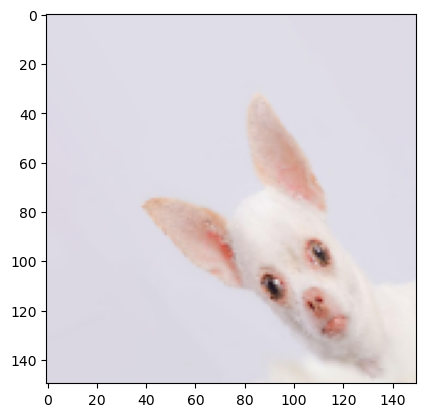

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0][0][0])

In [7]:
model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

model.fit(train_data,
               validation_data=test_data,
               epochs=10)

Epoch 1/10
 10/148 [=>............................] - ETA: 41:24 - loss: 1.3343 - accuracy: 0.4563

KeyboardInterrupt: 